In [0]:
import tensorflow as tf
import numpy as np
import math as m
import matplotlib.pyplot as plt 
import tensorflow.nn as nn 
from sklearn import datasets
from sklearn.preprocessing import normalize
import pandas as pd

In [66]:
# data set_up
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
print(df)
df = normalize(df)
print(df)
x_vals = np.array([x[0:3] for x in df]) # input
y_vals = np.array([x[3] for x in df]) # target_output

print(x_vals)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
5    5.4  3.9  1.7  0.4
6    4.6  3.4  1.4  0.3
7    5.0  3.4  1.5  0.2
8    4.4  2.9  1.4  0.2
9    4.9  3.1  1.5  0.1
10   5.4  3.7  1.5  0.2
11   4.8  3.4  1.6  0.2
12   4.8  3.0  1.4  0.1
13   4.3  3.0  1.1  0.1
14   5.8  4.0  1.2  0.2
15   5.7  4.4  1.5  0.4
16   5.4  3.9  1.3  0.4
17   5.1  3.5  1.4  0.3
18   5.7  3.8  1.7  0.3
19   5.1  3.8  1.5  0.3
20   5.4  3.4  1.7  0.2
21   5.1  3.7  1.5  0.4
22   4.6  3.6  1.0  0.2
23   5.1  3.3  1.7  0.5
24   4.8  3.4  1.9  0.2
25   5.0  3.0  1.6  0.2
26   5.0  3.4  1.6  0.4
27   5.2  3.5  1.5  0.2
28   5.2  3.4  1.4  0.2
29   4.7  3.2  1.6  0.2
..   ...  ...  ...  ...
120  6.9  3.2  5.7  2.3
121  5.6  2.8  4.9  2.0
122  7.7  2.8  6.7  2.0
123  6.3  2.7  4.9  1.8
124  6.7  3.3  5.7  2.1
125  7.2  3.2  6.0  1.8
126  6.2  2.8  4.8  1.8
127  6.1  3.0  4.9  1.8
128  6.4  2.8  5.6  2.1
129  7.2  3.0  5

In [67]:
print(y_vals)

[0.0315205  0.03380134 0.03426949 0.03478392 0.0316386  0.05808704
 0.0508767  0.0320874  0.03665562 0.01669451 0.02976797 0.03279129
 0.01714734 0.01866308 0.02797271 0.05430253 0.05883625 0.04725142
 0.04246464 0.0458617  0.03027177 0.06164067 0.03372916 0.07901744
 0.03233808 0.03305898 0.06382256 0.03101614 0.03138824 0.03384003
 0.03368608 0.06090743 0.0147266  0.02831544 0.03337508 0.03300492
 0.03007264 0.01602515 0.03646019 0.03167826 0.04801998 0.0573959
 0.03573138 0.09466737 0.06015208 0.05138162 0.030482   0.03460643
 0.03012718 0.03249135 0.15340221 0.17472599 0.16417236 0.17818253
 0.17496355 0.16474184 0.18446945 0.15493173 0.15029153 0.19508524
 0.15384615 0.187941   0.13148792 0.16772783 0.17622361 0.16078153
 0.18919257 0.13047672 0.18494574 0.14964948 0.21312598 0.16412362
 0.17653168 0.14490471 0.15588157 0.16287881 0.15743261 0.18798594
 0.18337737 0.13801311 0.15304371 0.14044168 0.15814134 0.1887454
 0.1925928  0.19073316 0.16893434 0.15998258 0.16944674 0.176597

In [0]:
# 80% for training, 20% for test
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False) 
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices] 
y_vals_test = y_vals[test_indices]


In [69]:
print(x_vals_train)
print(y_vals_test)
#y_vals_test = normalize(y_vals_test)

[[0.76741698 0.34773582 0.51560829]
 [0.790965   0.5694948  0.2214702 ]
 [0.82699754 0.52627116 0.19547215]
 [0.81228363 0.5361072  0.22743942]
 [0.7431482  0.36505526 0.5345452 ]
 [0.80003025 0.53915082 0.26087943]
 [0.77381111 0.59732787 0.2036345 ]
 [0.72965359 0.28954508 0.57909015]
 [0.74088576 0.33173989 0.55289982]
 [0.74549757 0.37274878 0.52417798]
 [0.86093857 0.44003527 0.24871559]
 [0.71529453 0.31790868 0.59607878]
 [0.80642366 0.5315065  0.25658935]
 [0.71653899 0.3307103  0.57323119]
 [0.77530021 0.28304611 0.54147951]
 [0.70558934 0.32722984 0.58287815]
 [0.80327412 0.55126656 0.22050662]
 [0.78889479 0.55222635 0.25244633]
 [0.82307218 0.51442011 0.24006272]
 [0.80212413 0.54690282 0.23699122]
 [0.80597792 0.52151512 0.26865931]
 [0.72992443 0.39103094 0.53440896]
 [0.80533308 0.54831188 0.2227517 ]
 [0.70779525 0.31850786 0.60162596]
 [0.78667474 0.35883409 0.48304589]
 [0.786991   0.55745196 0.26233033]
 [0.76262994 0.34186859 0.52595168]
 [0.68307923 0.34153961 0.59

In [0]:
x_data = tf.placeholder(shape=[None,3], dtype = tf.float32) 
y_target = tf.placeholder(shape=[None,1], dtype = tf.float32)

In [0]:
H_nodes = 10
W1 = tf.Variable(tf.random_normal(shape=[3,H_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[H_nodes])) 
W2 = tf.Variable(tf.random_normal(shape=[H_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1])) 
H_out = tf.nn.relu(tf.add(tf.matmul(x_data,W1),b1))
L_out = tf.nn.relu(tf.add(tf.matmul(H_out,W2),b2))
# loss and optimizer definition
#loss = tf.reduce_mean(tf.square(y_target - L_out))
loss = tf.nn.l2_loss(y_target - L_out)
optimizer = tf.train.GradientDescentOptimizer(0.0001) 
train_op = optimizer.minimize(loss)

100 0.06989843 0.019142818
200 0.06496151 0.018879328
300 0.06160415 0.018182822
400 0.05870356 0.017352302
500 0.05571762 0.016449826
600 0.053043067 0.015413087
700 0.050668634 0.014472006
800 0.047876157 0.013510481
900 0.045424737 0.012736417
1000 0.04325584 0.012063935
1100 0.04183439 0.011588274
1200 0.041044444 0.011189541
1300 0.040317122 0.010800435
1400 0.039507505 0.010438203
1500 0.038520366 0.010116091
1600 0.03791141 0.009939069
1700 0.0375276 0.009807862
1800 0.037274625 0.009688098
1900 0.03709863 0.009599231
2000 0.036968794 0.0095391795


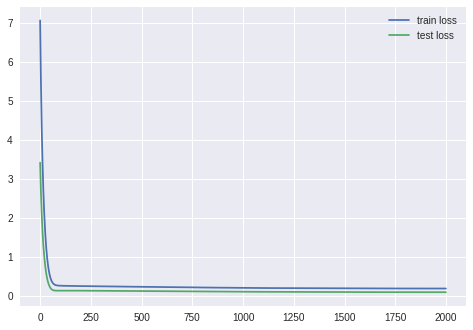

In [82]:
sess = tf.Session()
init = tf.global_variables_initializer() 
sess.run(init)
loss_vec = [] 
test_loss = []
for i in range(2000):
  sess.run(train_op, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
  
  temp_loss = sess.run(loss, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
  
  loss_vec.append(np.sqrt(temp_loss))
  
  test_temp_loss = sess.run(loss, feed_dict={x_data:x_vals_test, y_target:np.transpose([y_vals_test])}) 
  
  test_loss.append(np.sqrt(test_temp_loss))
  
  if (i+1)%100==0:
    print(i+1, temp_loss, test_temp_loss)

                                                                                   
plt.plot(loss_vec, label='train loss') 
plt.plot(test_loss, label='test loss') 
plt.legend()